# Insper - Modelagem e Simulação do Mundo Físico

### Simulção um livro deslizando sobre uma tábua

----
## Bibliotecas

In [431]:
#Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import *

----
## Parâmetros do Modelo

In [432]:
# Dimensões (m)
c = 0.22                    # Livro (comprimento)
l = 0.15                    # Livro (largura)
h = 0.03                    # Livro (altura)

# Áreas (m²)
As = l*h                    # Livro (area de contato contra o ar)

# Densidades (kg/m³)
rhoa = 1                    # Ar

# Massas (kg)
m = 0.45                    # Livro

# Gravidade (m/s²)
g = 9.81                    # Terra

# Coeficiente de arrasto
Cd = 1.05                   # Da 'As'

# Ângulo limite (°)
angle_l = 13.2              # Tábua

# μ cinético (coeficiente de atrito cinético)
mic = tan(radians(angle_l)) # Entre livro e tábua

----
## 1° Iteração

In [433]:
# modelo com arrasto
def modelo1 (X, t, angle):
    
    rang = radians(angle)

    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
    
    Nx = m*g*cos(rang)*sin(rang)
    Ny = m*g*cos(rang)**2
    Fatx = mic*m*g*cos(rang)**2
    Faty = mic*m*g*cos(rang)*sin(rang)
    Farx = (1/2)*rhoa*Cd*As*(vx**2 + vy**2)*cos(rang)
    Fary = (1/2)*rhoa*Cd*As*(vx**2 + vy**2)*sin(rang)
    
    dxdt = vx
    dydt = vy
    dvxdt = (Nx - Fatx - Farx)/m
    dvydt = ((+Ny + Faty + Fary)/m) - g
    
    if angle < angle_l:
        return [0, 0, 0, 0]
    elif y < 0:
        if dxdt > 0:
            return [dxdt, 0, -mic*g, 0]
        else:
            return [0, 0, 0, 0]
    else:
        return [dxdt, dydt, dvxdt, dvydt]

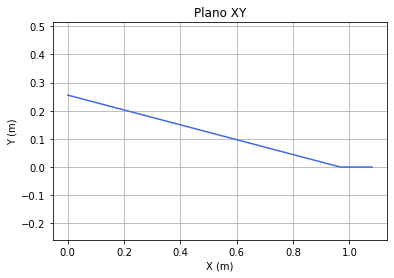

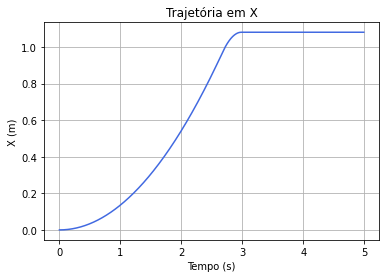

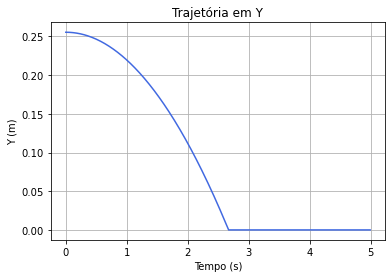

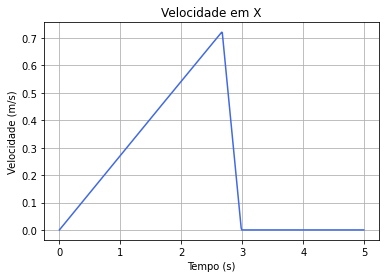

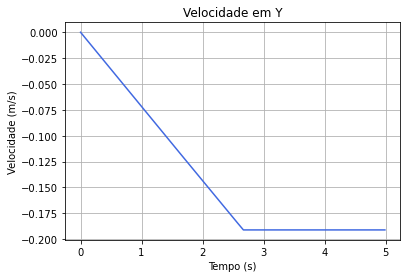

In [434]:
L_t = np.arange(0, 5, 0.01)

# Condições iniciais
angle = 14.8
x0 = [0, 1*sin(radians(angle)), 0, 0]

# Resolução numérica
r1 = odeint(modelo1, x0, L_t, args = (angle,))
L_x1 = r1[:,0]
L_y1 = r1[:,1]
L_vx1 = r1[:,2]
L_vy1 = r1[:,3]

# Trajetória no plano XY
plt.plot(L_x1, L_y1, 'royalblue')
plt.axis('equal')
plt.title('Plano XY')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.show()

# Trajetória em X
plt.plot(L_t, L_x1, 'royalblue')
plt.title('Trajetória em X')
plt.xlabel('Tempo (s)')
plt.ylabel('X (m)')
plt.grid(True)
plt.show()

# Trajetória em Y
plt.plot(L_t, L_y1, 'royalblue')
plt.title('Trajetória em Y')
plt.xlabel('Tempo (s)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.show()

# Velocidade em X
plt.plot(L_t, L_vx1, 'royalblue')
plt.title('Velocidade em X')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(True)
plt.show()

# Velocidade em Y
plt.plot(L_t, L_vy1, 'royalblue')
plt.title('Velocidade em Y')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(True)
plt.show()

----
## Gráficos para apresentação
#### Como seria sem o arrasto?

In [435]:
# Modelo sem Arrasto
def modelo2 (X, t, angle):
    
    rang = radians(angle)

    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
    
    Nx = g*cos(rang)*sin(rang)
    Ny = g*cos(rang)**2
    Fatx = mic*g*cos(rang)**2
    Faty = mic*g*cos(rang)*sin(rang)
    
    dxdt = vx
    dydt = vy
    dvxdt = Nx - Fatx
    dvydt = Ny + Faty - g
    
    if angle < angle_l:
        return [0, 0, 0, 0]
    elif y < 0:
        if dxdt > 0:
            return [dxdt, 0, -mic*g, 0]
        else:
            return [0, 0, 0, 0]
    else:
        return [dxdt, dydt, dvxdt, dvydt]



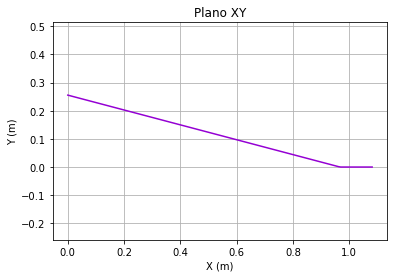

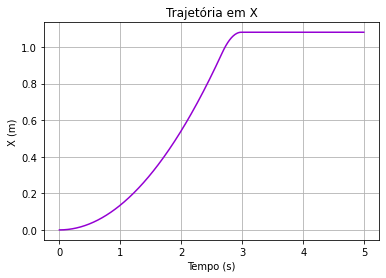

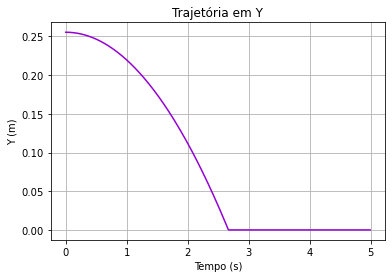

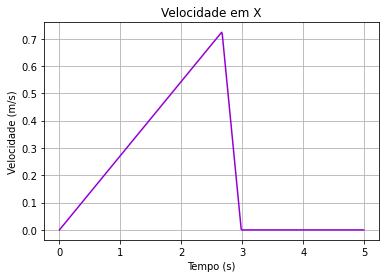

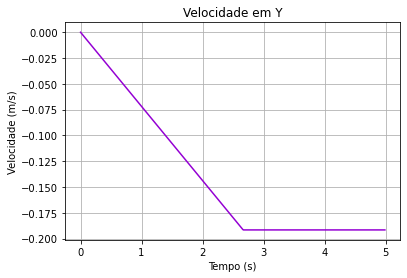

In [436]:
# Resolução numérica
r2 = odeint(modelo2, x0, L_t, args = (angle,))
L_x2 = r2[:,0]
L_y2 = r2[:,1]
L_vx2 = r2[:,2]
L_vy2 = r2[:,3]

# Trajetória no plano XY
plt.plot(L_x2, L_y2, 'darkviolet')
plt.axis('equal')
plt.title('Plano XY')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.show()

# Trajetória em X
plt.plot(L_t, L_x2, 'darkviolet')
plt.title('Trajetória em X')
plt.xlabel('Tempo (s)')
plt.ylabel('X (m)')
plt.grid(True)
plt.show()

# Trajetória em Y
plt.plot(L_t, L_y2, 'darkviolet')
plt.title('Trajetória em Y')
plt.xlabel('Tempo (s)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.show()

# Velocidade em X
plt.plot(L_t, L_vx2, 'darkviolet')
plt.title('Velocidade em X')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(True)
plt.show()

# Velocidade em Y
plt.plot(L_t, L_vy2, 'darkviolet')
plt.title('Velocidade em Y')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(True)
plt.show()

## Comparação entre modelo1 e modelo2

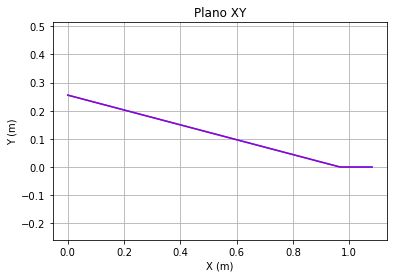

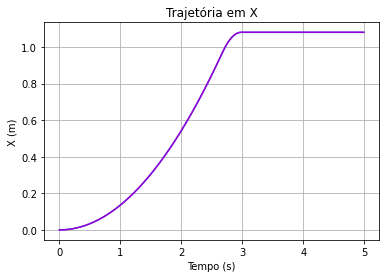

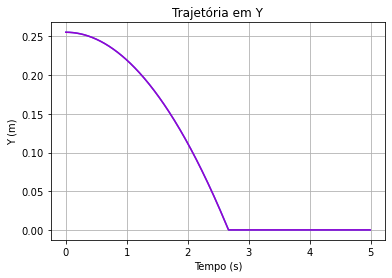

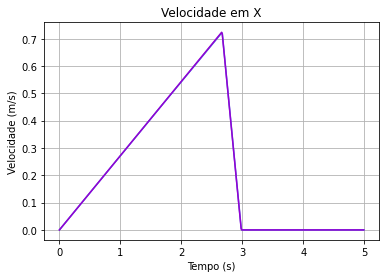

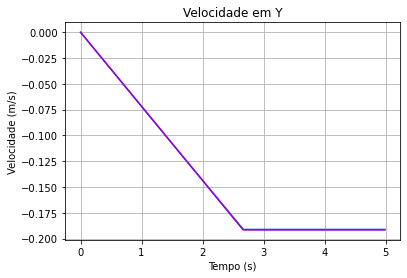

In [437]:
# Trajetória em x y
# Trajetória no plano XY
plt.plot(L_x1, L_y1, 'royalblue')
plt.plot(L_x2, L_y2, 'darkviolet')
plt.axis('equal')
plt.title('Plano XY')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.show()

# Trajetória em X
plt.plot(L_t, L_x1, 'royalblue')
plt.plot(L_t, L_x2, 'darkviolet')
plt.title('Trajetória em X')
plt.xlabel('Tempo (s)')
plt.ylabel('X (m)')
plt.grid(True)
plt.show()

# Trajetória em Y
plt.plot(L_t, L_y1, 'royalblue')
plt.plot(L_t, L_y2, 'darkviolet')
plt.title('Trajetória em Y')
plt.xlabel('Tempo (s)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.show()

# Velocidade em X
plt.plot(L_t, L_vx1, 'royalblue')
plt.plot(L_t, L_vx2, 'darkviolet')
plt.title('Velocidade em X')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(True)
plt.show()

# Velocidade em Y
plt.plot(L_t, L_vy1, 'royalblue')
plt.plot(L_t, L_vy2, 'darkviolet')
plt.title('Velocidade em Y')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.grid(True)
plt.show()

----
## Gráfico Comclusivo